# **STEP 1 — Import Libraries**

In [1]:
pip install opencv-python scikit-image matplotlib


Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from skimage import io
from skimage.filters import threshold_otsu
from skimage.morphology import remove_small_objects
from skimage.segmentation import watershed
from scipy import ndimage as ndi

# **STEP 2 — Load Image (Kaggle Path)**

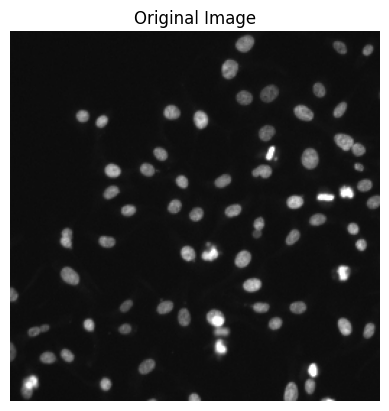

In [3]:
img_folder = "/kaggle/input/datasets/mahmudulhasantasin/data-science-bowl-80-10-10/data_science_bowl_2018-10-fold/fold8/img/"

files = os.listdir(img_folder)
image_path = os.path.join(img_folder, files[0])

image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")
plt.show()

# **STEP 3 — Preprocessing (Binary Segmentation)**

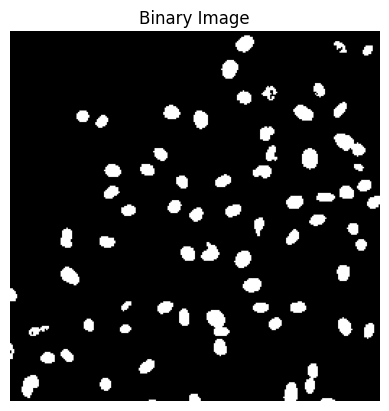

In [4]:
thresh = threshold_otsu(gray)
binary = gray > thresh

plt.imshow(binary, cmap='gray')
plt.title("Binary Image")
plt.axis("off")
plt.show()

# **STEP 4 — Distance Transform**

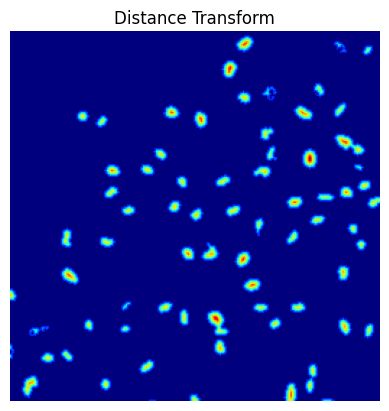

In [5]:
distance = ndi.distance_transform_edt(binary)

plt.imshow(distance, cmap='jet')
plt.title("Distance Transform")
plt.axis("off")
plt.show()

# **STEP 5 — Watershed WITHOUT Markers**

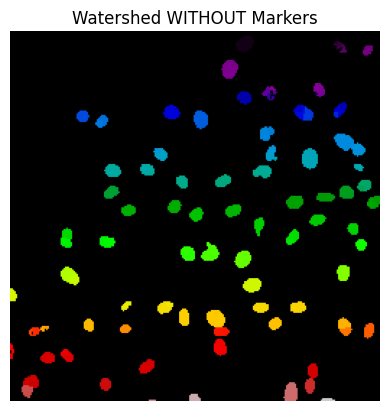

In [6]:
labels_no_markers = watershed(-distance, mask=binary)

plt.imshow(labels_no_markers, cmap='nipy_spectral')
plt.title("Watershed WITHOUT Markers")
plt.axis("off")
plt.show()

# **STEP 6 — Create Markers (Key Step)**

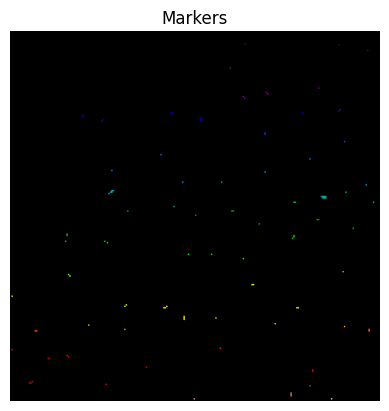

In [7]:
# Import missing function
from skimage.feature import peak_local_max

# Detect local maxima
coords = peak_local_max(distance, footprint=np.ones((25, 25)), labels=binary)

# Create empty mask
mask = np.zeros(distance.shape, dtype=bool)

# Mark peak locations
mask[tuple(coords.T)] = True

# Label markers
from scipy import ndimage as ndi
markers = ndi.label(mask)[0]

# Visualize markers
plt.imshow(markers, cmap='nipy_spectral')
plt.title("Markers")
plt.axis("off")
plt.show()

# **STEP 7 — Marker Controlled Watershed**

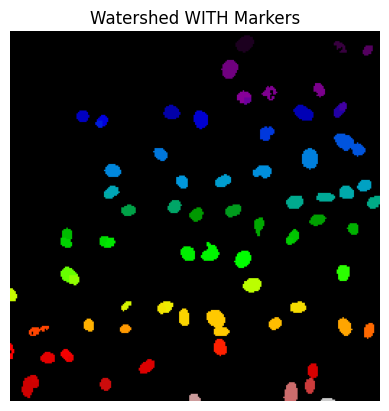

In [8]:
labels_markers = watershed(-distance, markers, mask=binary)

plt.imshow(labels_markers, cmap='nipy_spectral')
plt.title("Watershed WITH Markers")
plt.axis("off")
plt.show()

# **STEP 8 — Final Comparison**

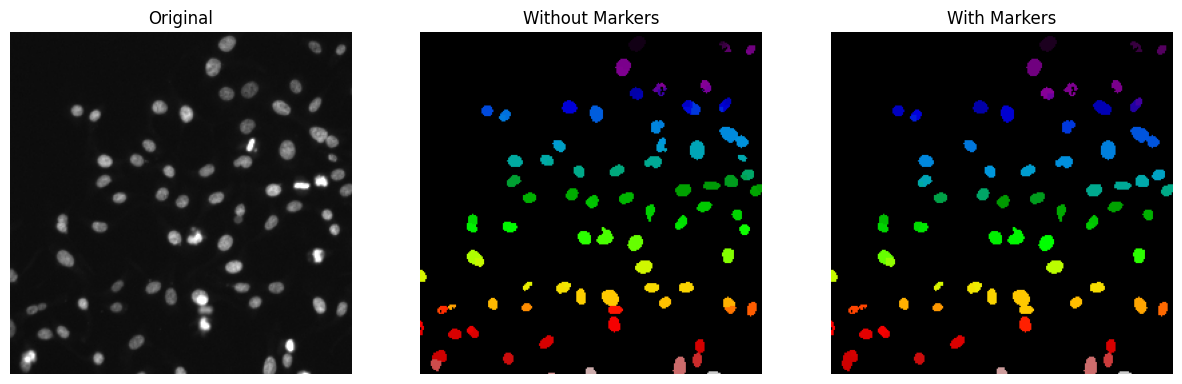

In [9]:
fig, ax = plt.subplots(1,3, figsize=(15,5))

ax[0].imshow(image_rgb)
ax[0].set_title("Original")

ax[1].imshow(labels_no_markers, cmap='nipy_spectral')
ax[1].set_title("Without Markers")

ax[2].imshow(labels_markers, cmap='nipy_spectral')
ax[2].set_title("With Markers")

for a in ax:
    a.axis("off")

plt.show()